# Loading and Preprocessing the Data

In [1]:
import os

import pandas as pd


dblp_path = "dblp-v10.csv"
test_path = "test.csv"

# Load the full dataset
df_dblp = pd.read_csv(dblp_path)

# Load the crawled dataset
df_test = pd.read_csv(test_path)

In [2]:
print("DBLP dataset shape:", df_dblp.shape)
df_dblp.head()

DBLP dataset shape: (1000000, 8)


,abstract,authors,n_citation,references,title,venue,year,id
0,"In this paper, a robust 3D triangular mesh wat...","['S. Ben Jabra', 'Ezzeddine Zagrouba']",50,"['09cb2d7d-47d1-4a85-bfe5-faa8221e644b', '10aa...",A new approach of 3D watermarking based on ima...,international symposium on computers and commu...,2008,4ab3735c-80f1-472d-b953-fa0557fed28b
1,We studied an autoassociative neural network w...,"['Joaquín J. Torres', 'Jesús M. Cortés', 'Joaq...",50,"['4017c9d2-9845-4ad2-ad5b-ba65523727c5', 'b118...",Attractor neural networks with activity-depend...,Neurocomputing,2007,4ab39729-af77-46f7-a662-16984fb9c1db
2,It is well-known that Sturmian sequences are t...,"['Genevi eve Paquin', 'Laurent Vuillon']",50,"['1c655ee2-067d-4bc4-b8cc-bc779e9a7f10', '2e4e...",A characterization of balanced episturmian seq...,Electronic Journal of Combinatorics,2007,4ab3a4cf-1d96-4ce5-ab6f-b3e19fc260de
3,One of the fundamental challenges of recognizi...,"['Yaser Sheikh', 'Mumtaz Sheikh', 'Mubarak Shah']",221,"['056116c1-9e7a-4f9b-a918-44eb199e67d6', '05ac...",Exploring the space of a human action,international conference on computer vision,2005,4ab3a98c-3620-47ec-b578-884ecf4a6206
4,This paper generalizes previous optimal upper ...,"['Efraim Laksman', 'Håkan Lennerstad', 'Magnus...",0,"['01a765b8-0cb3-495c-996f-29c36756b435', '5dbc...",Generalized upper bounds on the minimum distan...,Ima Journal of Mathematical Control and Inform...,2015,4ab3b585-82b4-4207-91dd-b6bce7e27c4e


In [3]:
print("Test dataset shape:", df_test.shape)
df_test.head()

Test dataset shape: (10349, 8)


,id,title,authors,venue,year,n_citation,references,abstract
0,8f166f6819351afdfaa4bd5f3771dc625c33272f,Response of an infinite beam on a bilinear ela...,"['Yin Zhang', 'Xiaomin Liu', 'Yujie Wei']",European Journal of Mechanics - A/Solids,2018,15,"['4aec9f9f7bfcd5d141601f9dfb426c30330797bb', '...",NaN
1,1d1a6ff3cd477d7398914469bdb02f973ddfeb10,Industry Foundation Classes: A Standardized Da...,"['A. Borrmann', 'J. Beetz', 'C. Koch', 'T. Lie...",NaN,2018,56,"['dfea28f8ddfad32d81cbc531f9f75595ea11bd3e', '...",NaN
2,c8382f7462ba089bd8036e880a2891e00046f02b,"Hyperuricemia, Acute and Chronic Kidney Diseas...","['Richard J. Johnson', 'G. Bakris', 'C. Borghi...",American Journal of Kidney Diseases,2018,436,"['357b0d3c96db8bf0a73e784cce1e594b26099bed', '...","Urate is a cause of gout, kidney stones, and a..."
3,1c7325280db7f8aaa28993270c155cf9cfac5157,Time Effects on Settlement of Rigid Pile Compo...,"['Meijuan Xu', 'P. Ni', 'G. Mei', 'Yanlin Zhao']",International Journal of Computational Methods,2018,11,"['6a5cf0bbb99bfae41c93f4a4ecee95140056f998', '...",The behavior of pile composite foundation is s...
4,ab3aeccfd42bd7ac629a22e19c499c19a18904bf,Seismic response of bridge piers on pile group...,"['Francisco González', 'L. Padrón', 'S. Carbon...",Earthquake engineering & structural dynamics (...,2018,18,"['d82c701f56c8ef8babc75f5a791714f550ebb89c', '...",This paper presents a wide parametric study ai...


In [4]:
df_dblp.info()
df_dblp.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   abstract    827533 non-null   object
 1   authors     999998 non-null   object
 2   n_citation  1000000 non-null  int64 
 3   references  875583 non-null   object
 4   title       1000000 non-null  object
 5   venue       822245 non-null   object
 6   year        1000000 non-null  int64 
 7   id          1000000 non-null  object
dtypes: int64(2), object(6)
memory usage: 61.0+ MB


abstract      172467
authors            2
n_citation         0
references    124417
title              0
venue         177755
year               0
id                 0
dtype: int64

In [5]:
# Create a sampled dataset
sample_fraction = 0.01  # 1%
df_dblp_sample = df_dblp.sample(frac=sample_fraction, random_state=42)

print("Sample shape:", df_dblp_sample.shape)

Sample shape: (10000, 8)


In [6]:
import ast

# Function to convert strings to python lists
def safe_list_convert(val):
    try:
        return ast.literal_eval(val)
    except (ValueError, SyntaxError):
        return []

for col in ['authors', 'references']:
    if col in df_dblp.columns:
        df_dblp[col] = df_dblp[col].apply(safe_list_convert)
        df_dblp_sample[col] = df_dblp_sample[col].apply(safe_list_convert)
        
    if col in df_test.columns:
        df_test[col] = df_test[col].apply(safe_list_convert)

In [7]:
# Convert numerical columns to numeric data types

df_dblp['year'] = pd.to_numeric(df_dblp['year'], errors='coerce')
df_dblp['n_citation'] = pd.to_numeric(df_dblp['n_citation'], errors='coerce')

df_dblp_sample['year'] = pd.to_numeric(df_dblp_sample['year'], errors='coerce')
df_dblp_sample['n_citation'] = pd.to_numeric(df_dblp_sample['n_citation'], errors='coerce')

df_test['year'] = pd.to_numeric(df_test['year'], errors='coerce')
df_test['n_citation'] = pd.to_numeric(df_test['n_citation'], errors='coerce')

In [8]:
# Drop rows where 'id' or 'title' is missing
df_dblp.dropna(subset=['id', 'title'], inplace=True)
df_dblp_sample.dropna(subset=['id', 'title'], inplace=True)
df_test.dropna(subset=['id', 'title'], inplace=True)

# Fill missing abstracts with an empty string
df_dblp['abstract'].fillna("", inplace=True)
df_dblp_sample['abstract'].fillna("", inplace=True)
df_test['abstract'].fillna("", inplace=True)

# Fill missing venues with an empty string
df_dblp['venue'].fillna("", inplace=True)
df_dblp_sample['venue'].fillna("", inplace=True)
df_test['venue'].fillna("", inplace=True)

In [9]:
# Check null values
df_dblp.isnull().sum()

abstract      0
authors       0
n_citation    0
references    0
title         0
venue         0
year          0
id            0
dtype: int64

# 1 EDA

## 1.1 Basic

In [11]:
# -----------------------------------------------------------
# 1. Import libraries and basic setup
# -----------------------------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [12]:
# Create helper columns for # of authors, # of references, title length, etc.
df_dblp['num_authors'] = df_dblp['authors'].apply(len)
df_dblp['num_refs'] = df_dblp['references'].apply(len)
df_dblp['title_length'] = df_dblp['title'].apply(lambda x: len(str(x)))

Bar charts for the number of publications in specified year ranges
* Ranges: 1937-1950, 1950-1970, 1970-1990

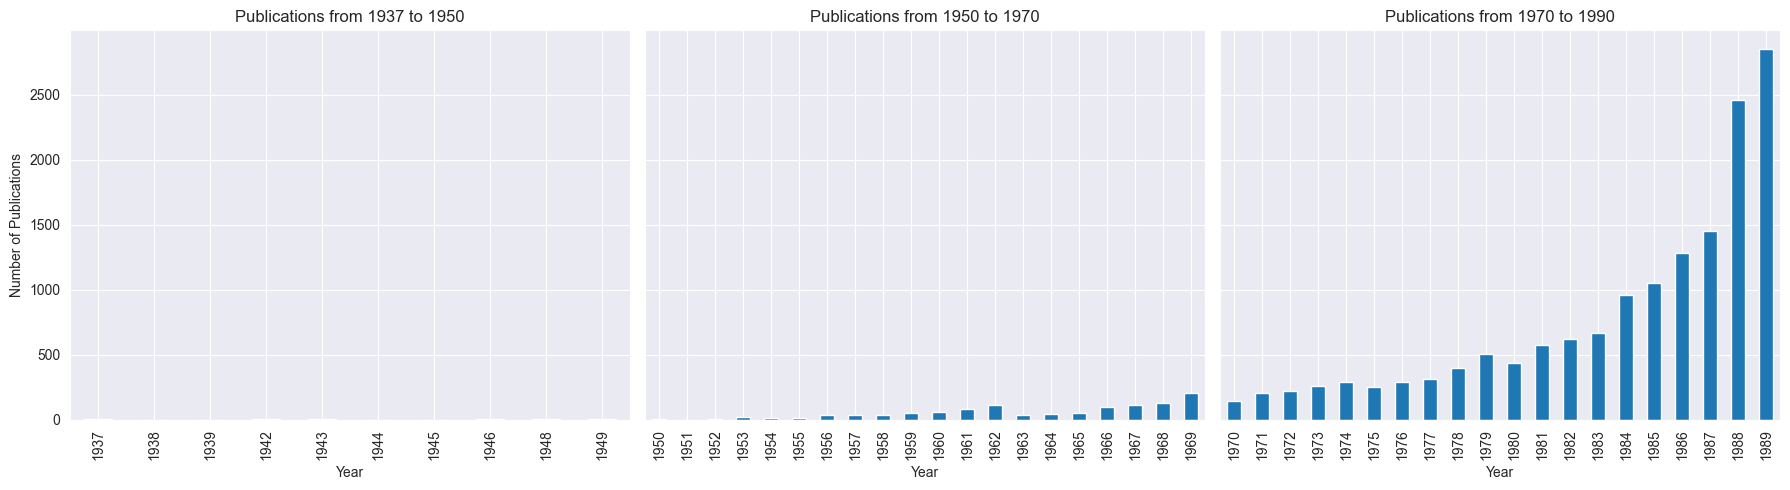

In [13]:
def plot_year_range(df, start_year, end_year, ax=None):
    """Group the data by year in the given [start_year, end_year) range,
    then plot a bar chart of number of papers per year."""
    subset = df[(df['year'] >= start_year) & (df['year'] < end_year)]
    # Count how many publications per year
    publications_per_year = subset.groupby('year')['id'].count()
    
    if ax is None:
        ax = publications_per_year.plot(kind='bar')
    else:
        publications_per_year.plot(kind='bar', ax=ax)
    
    ax.set_title(f'Publications from {start_year} to {end_year}')
    ax.set_ylabel('Number of Publications')
    ax.set_xlabel('Year')
    return ax

fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

plot_year_range(df_dblp, 1937, 1950, ax=axes[0])
plot_year_range(df_dblp, 1950, 1970, ax=axes[1])
plot_year_range(df_dblp, 1970, 1990, ax=axes[2])

plt.tight_layout()
plt.show()

Bar chart of the number of references over the years

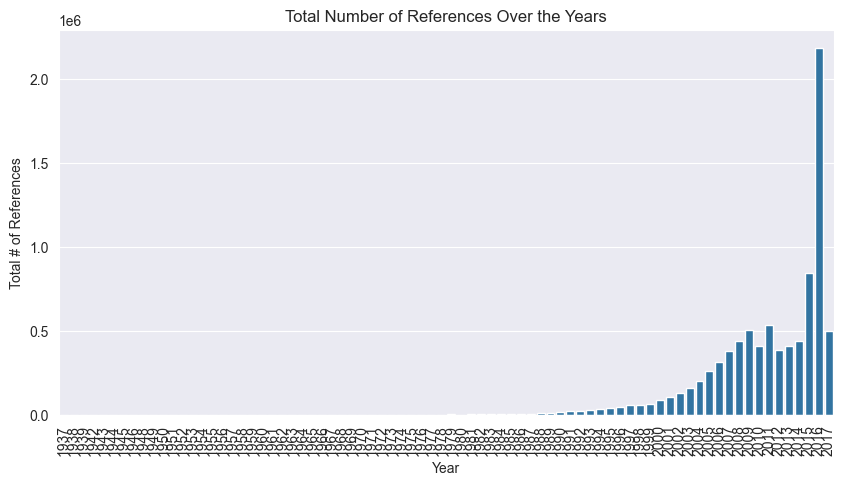

In [14]:
references_per_year = df_dblp.groupby('year')['num_refs'].sum().reset_index()

plt.figure(figsize=(10,5))
sns.barplot(x='year', y='num_refs', data=references_per_year)
plt.title('Total Number of References Over the Years')
plt.xlabel('Year')
plt.ylabel('Total # of References')
plt.xticks(rotation=90)
plt.show()

Bar chart of the number of authors over the years

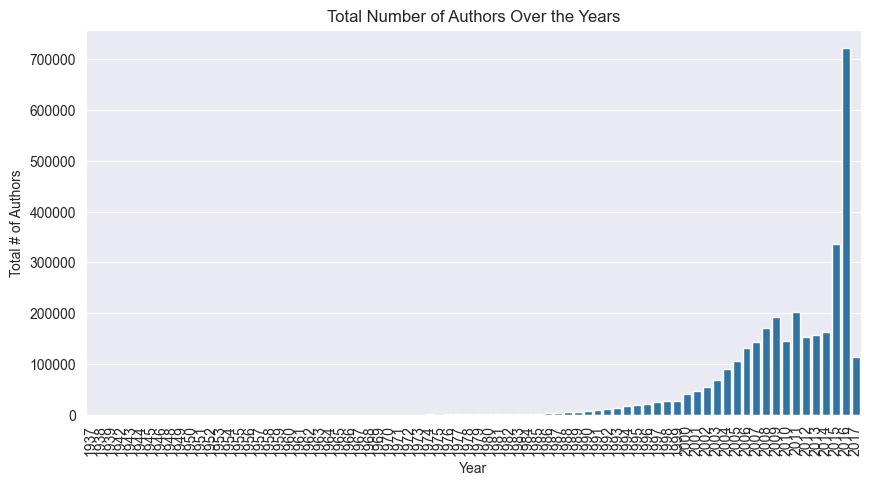

In [15]:
authors_per_year = df_dblp.groupby('year')['num_authors'].sum().reset_index()

plt.figure(figsize=(10,5))
sns.barplot(x='year', y='num_authors', data=authors_per_year)
plt.title('Total Number of Authors Over the Years')
plt.xlabel('Year')
plt.ylabel('Total # of Authors')
plt.xticks(rotation=90)
plt.show()

Pearson & Spearman correlation between
* number of authors and number of references
* number of authors and number of citations

In [16]:
from scipy.stats import pearsonr, spearmanr

# (a) Correlation between num_authors & num_refs
pearson_a, pval_pearson_a = pearsonr(df_dblp['num_authors'], df_dblp['num_refs'])
spearman_a, pval_spearman_a = spearmanr(df_dblp['num_authors'], df_dblp['num_refs'])

print(f"(a) #Authors vs. #References:")
print(f" Pearson Correlation: {pearson_a:.3f} (p-value={pval_pearson_a:.3g})")
print(f" Spearman Correlation: {spearman_a:.3f} (p-value={pval_spearman_a:.3g})")

# (b) Correlation between num_authors & n_citation
pearson_b, pval_pearson_b = pearsonr(df_dblp['num_authors'], df_dblp['n_citation'])
spearman_b, pval_spearman_b = spearmanr(df_dblp['num_authors'], df_dblp['n_citation'])

print(f"\n(b) #Authors vs. #Citations:")
print(f" Pearson Correlation: {pearson_b:.3f} (p-value={pval_pearson_b:.3g})")
print(f" Spearman Correlation: {spearman_b:.3f} (p-value={pval_spearman_b:.3g})")

(a) #Authors vs. #References:
 Pearson Correlation: 0.056 (p-value=0)
 Spearman Correlation: 0.087 (p-value=0)

(b) #Authors vs. #Citations:
 Pearson Correlation: -0.003 (p-value=0.00517)
 Spearman Correlation: -0.017 (p-value=5.23e-62)


Bar chart of the title length over the years

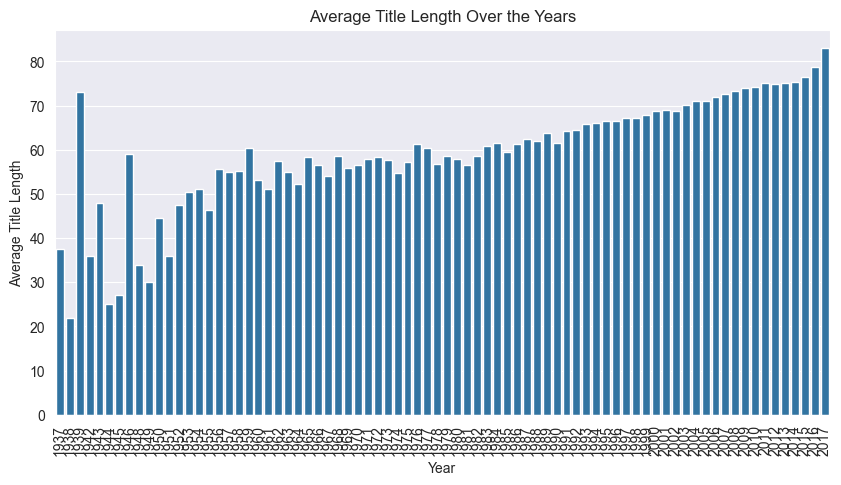

In [17]:
title_length_per_year = (df_dblp.groupby('year')['title_length']
                         .mean()
                         .reset_index())

plt.figure(figsize=(10,5))
sns.barplot(x='year', y='title_length', data=title_length_per_year)
plt.title('Average Title Length Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Title Length')
plt.xticks(rotation=90)
plt.show()

Wordcloud of the abstracts

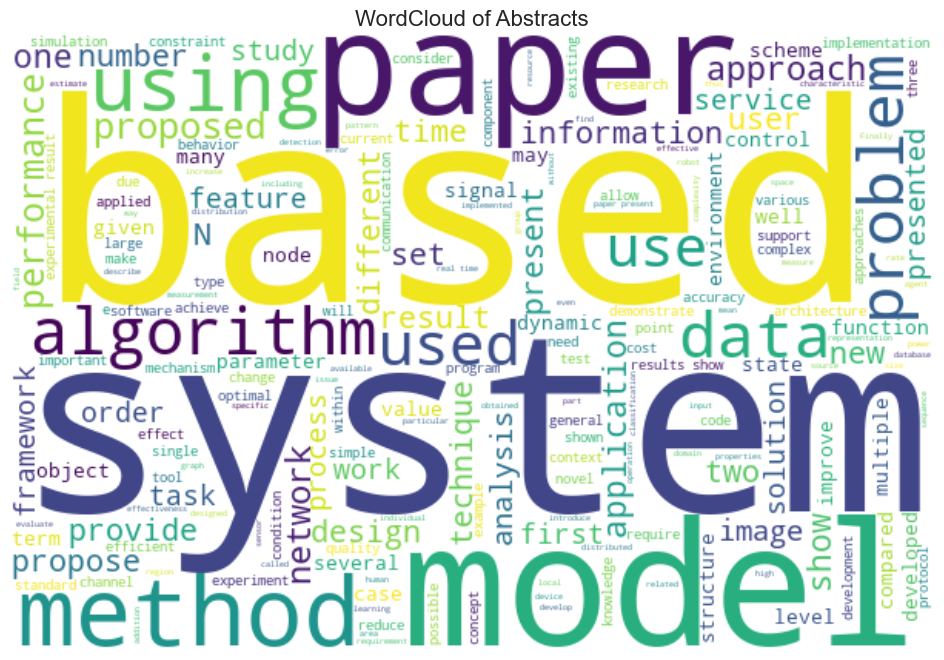

In [20]:
# Used sampled dataset, due to memory limits
all_abstracts = " ".join(df_dblp_sample['abstract'].astype(str))

wordcloud = WordCloud(width=600, height=400,
                      background_color='white',
                      max_words=200).generate(all_abstracts)

plt.figure(figsize=(12,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("WordCloud of Abstracts", fontsize=16)
plt.show()

Correlation between a paper’s title length and the (average) title length of the papers it references.

In [21]:
# We'll do this by:
#   1) For each paper, calculate the average title length of its referenced papers.
#   2) Then find the correlation between that average reference-title-length and the paper's own title length.

# Create a dictionary {paper_id -> title_length} for quick lookup
id_to_title_length = dict(zip(df_dblp['id'], df_dblp['title_length']))

def avg_refs_title_length(ref_list):
    if not ref_list:
        return np.nan
    lengths = [id_to_title_length.get(ref_id, np.nan) for ref_id in ref_list]
    lengths = [l for l in lengths if not np.isnan(l)]
    if len(lengths) == 0:
        return np.nan
    return np.mean(lengths)

df_dblp['avg_ref_title_length'] = df_dblp['references'].apply(avg_refs_title_length)


valid_rows = df_dblp.dropna(subset=['title_length', 'avg_ref_title_length'])
pearson_refs, pval_pearson_refs = pearsonr(valid_rows['title_length'], valid_rows['avg_ref_title_length'])
spearman_refs, pval_spearman_refs = spearmanr(valid_rows['title_length'], valid_rows['avg_ref_title_length'])

print("Correlation between a paper’s title length and the average title length of its references:")
print(f" Pearson: {pearson_refs:.3f}, p-value={pval_pearson_refs:.3g}")
print(f" Spearman: {spearman_refs:.3f}, p-value={pval_spearman_refs:.3g}")

Correlation between a paper’s title length and the average title length of its references:
 Pearson: 0.272, p-value=0
 Spearman: 0.274, p-value=0


Top 10 authors with the most publications

In [22]:
# We'll 'explode' the authors column so each author is on its own row.
df_exploded = df_dblp.explode('authors')
author_pub_counts = df_exploded.groupby('authors')['id'].count().sort_values(ascending=False)

top10_authors_publications = author_pub_counts.head(10)
print("Top 10 Authors (by # of publications):")
print(top10_authors_publications)

Top 10 Authors (by # of publications):
authors
Wei Wang       950
Wei Zhang      657
Yang Liu       629
Lei Zhang      579
Wei Li         559
Jun Wang       544
Lei Wang       519
Lajos Hanzo    458
Wei Liu        456
Jun Zhang      455
Name: id, dtype: int64


Top 10 authors with the most citations

In [23]:
# Sum the citations of all papers each author is involved in.
author_citations = df_exploded.groupby('authors')['n_citation'].sum().sort_values(ascending=False)

top10_authors_citations = author_citations.head(10)
print("\nTop 10 Authors (by total citations across their papers):")
print(top10_authors_citations)


Top 10 Authors (by total citations across their papers):
authors
David G. Lowe        65344
Hari Balakrishnan    55096
Scott Shenker        54164
Ian F. Akyildiz      53654
Michael I. Jordan    53448
Ion Stoica           52890
Chih-Jen Lin         52302
Takeo Kanade         50743
Deborah Estrin       49925
Vladimir Vapnik      49755
Name: n_citation, dtype: int64


Top 10 papers with the most references

In [24]:
# The 'num_refs' column is the length of the references list.
df_sorted_by_refs = df_dblp.sort_values('num_refs', ascending=False)
top10_papers_refs = df_sorted_by_refs[['id','title','num_refs']].head(10)

print("\nTop 10 Papers (by # of references):")
print(top10_papers_refs)


Top 10 Papers (by # of references):
                                          id  \
371369  c6090c87-4730-4ae6-86cd-7663adb23b2b   
780292  a1c66cbc-77ad-4167-9787-4936221427ad   
104143  6d4c5b32-8e13-4022-b67f-1ace7ffc91d0   
214646  91f1068b-9feb-4799-b920-67205c36999b   
484969  ebe93176-7150-4ce6-8d77-880a4e13beb0   
223901  95044198-6db4-4224-a499-d8e8a3e1f52d   
302124  af0e7b77-e5c3-4d64-adc2-cc43a4b0976e   
707510  0d3b901e-4179-4ed6-badf-7ce4237dadd4   
325083  b6b998ee-2e78-4d0e-8c55-e7806e449b9e   
538381  fdbb0c65-8b80-43e7-a839-8738e03cd72e   

                                                    title  num_refs  
371369  Comprehensive frequency-dependent substrate no...       759  
780292                    Time in Qualitative Simulation.       561  
104143                  Bibliography on cyclostationarity       412  
214646  Fifty Years of MIMO Detection: The Road to Lar...       396  
484969  An Exploration of Enterprise Architecture Rese...       394  
223901  Struct

Top 10 papers with the most citations

In [ ]:
df_sorted_by_cites = df_dblp.sort_values('n_citation', ascending=False)
top10_papers_citations = df_sorted_by_cites[['id','title','n_citation']].head(10)

print("\nTop 10 Papers (by # of citations):")
print(top10_papers_citations)

Simple approach to see how well # of publications can predict total # of citations for a given author

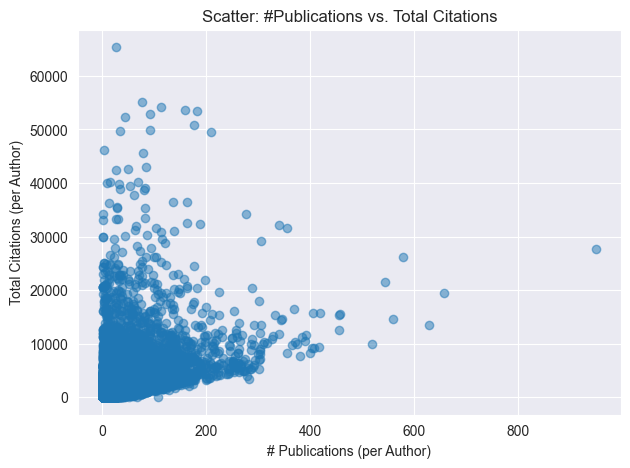


Correlation between #Publications and Total Citations (by author):
 Pearson: 0.582, p-value=0
 Spearman: 0.602, p-value=0

Linear Regression: total_citations ~ pub_count
 Coeff (slope) = 43.534
 Intercept = -26.562
 R^2 = 0.339


In [26]:
#  (A) For each author, compute:
#        - total number of publications
#        - total number of citations across their publications
#  (B) Fit a simple linear regression or compute correlation

author_stats = df_exploded.groupby('authors').agg({
    'id': 'count',             # how many papers
    'n_citation': 'sum'        # total citations
}).rename(columns={'id': 'pub_count', 'n_citation': 'total_citations'})


plt.figure(figsize=(7,5))
plt.scatter(author_stats['pub_count'], author_stats['total_citations'], alpha=0.5)
plt.xlabel("# Publications (per Author)")
plt.ylabel("Total Citations (per Author)")
plt.title("Scatter: #Publications vs. Total Citations")
plt.show()

# Pearson & Spearman correlation
pearson_authors, pval_authors = pearsonr(author_stats['pub_count'], author_stats['total_citations'])
spearman_authors, pval_spearman_authors = spearmanr(author_stats['pub_count'], author_stats['total_citations'])

print("\nCorrelation between #Publications and Total Citations (by author):")
print(f" Pearson: {pearson_authors:.3f}, p-value={pval_authors:.3g}")
print(f" Spearman: {spearman_authors:.3f}, p-value={pval_spearman_authors:.3g}")

# Simple Linear Regression
from sklearn.linear_model import LinearRegression

X = author_stats[['pub_count']]
y = author_stats['total_citations']

reg = LinearRegression()
reg.fit(X, y)
r2_score = reg.score(X, y)
print(f"\nLinear Regression: total_citations ~ pub_count")
print(f" Coeff (slope) = {reg.coef_[0]:.3f}")
print(f" Intercept = {reg.intercept_:.3f}")
print(f" R^2 = {r2_score:.3f}")

## 1.2 Network analysis

In [11]:
import networkx as nx
import igraph as ig

## 1.2.1 Citation Network (Paper-Paper Network)

### Nodes: Papers, Edges: Citation relationships (from `references` field)

In [28]:
G_citation = nx.DiGraph()

paper_ids = set(df_dblp_sample['id'])

# Add nodes (papers)
G_citation.add_nodes_from(paper_ids)

# Add edges: 
# For each paper (row), each reference is an edge from that paper -> reference
for idx, row in df_dblp_sample.iterrows():
    citing_paper = row['id']
    references = row['references']
    for ref_id in references:
        if ref_id in paper_ids:  # only add edges if the referenced paper is in the sample
            G_citation.add_edge(citing_paper, ref_id)

print("Citation Network Stats:")
print(f"Number of nodes (papers): {G_citation.number_of_nodes()}")
print(f"Number of edges (citations): {G_citation.number_of_edges()}")

Citation Network Stats:
Number of nodes (papers): 10000
Number of edges (citations): 289


#### Plot the clustering coefficient over time to observe how interconnected the citation network becomes.

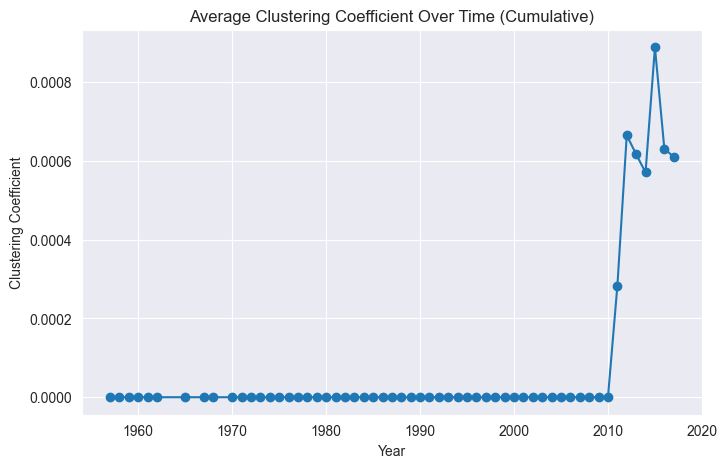

In [30]:
years = sorted(df_dblp_sample['year'].dropna().unique())
clustering_by_year = []

G_citation_undirected = G_citation.to_undirected()

# Precompute a dictionary of {paper_id -> year}
paper_year_map = df_dblp_sample.set_index('id')['year'].to_dict()

for y in years:
    # Collect papers published up to year y
    relevant_papers = {pid for pid in paper_ids if (paper_year_map[pid] <= y)}
    # Induce a subgraph with relevant papers
    G_sub = G_citation_undirected.subgraph(relevant_papers)
    if G_sub.number_of_nodes() > 1:
        avg_clustering = nx.average_clustering(G_sub)
    else:
        avg_clustering = 0
    clustering_by_year.append((y, avg_clustering))

df_clust = pd.DataFrame(clustering_by_year, columns=['year','avg_clustering'])

plt.figure(figsize=(8,5))
plt.plot(df_clust['year'], df_clust['avg_clustering'], marker='o')
plt.title('Average Clustering Coefficient Over Time (Cumulative)')
plt.xlabel('Year')
plt.ylabel('Clustering Coefficient')
plt.show()

#### Compute the average path length and diameter to understand the network's reachability.

In [31]:
# Largest connected component of undirected graph
components = nx.connected_components(G_citation_undirected)
largest_cc = max(components, key=len)
G_lcc = G_citation_undirected.subgraph(largest_cc).copy()

# Average path length
avg_path_len = nx.average_shortest_path_length(G_lcc)
print("Average Path Length (largest connected component):", avg_path_len)

# Diameter
diameter = nx.diameter(G_lcc)
print("Diameter (largest connected component):", diameter)

Average Path Length (largest connected component): 2.109090909090909
Diameter (largest connected component): 4


#### Identify influential papers using PageRank.

In [34]:
# PageRank on directed graph
pagerank_scores = nx.pagerank(G_citation, alpha=0.85)

# Sort by score
pagerank_sorted = sorted(pagerank_scores.items(), key=lambda x: x[1], reverse=True)

top_10_papers = pagerank_sorted[:10]
print("Top 10 Papers by PageRank:")
for paper_id, score in top_10_papers:
    title = df_dblp_sample.loc[df_dblp_sample['id'] == paper_id, 'title'].values[0]
    print(f"PageRank={score:.4f} | {title}")

Top 10 Papers by PageRank:
PageRank=0.0007 | A Tractable Approach to Coverage and Rate in Cellular Networks
PageRank=0.0006 | New Support Vector Algorithms
PageRank=0.0005 | Support vector machine active learning with applications to text classification
PageRank=0.0004 | Protecting respondents identities in microdata release
PageRank=0.0004 | Designing reliable systems from unreliable components: the challenges of transistor variability and degradation
PageRank=0.0004 | Blocking blog spam with language model disagreement
PageRank=0.0004 | What can you do with a Web in your Pocket
PageRank=0.0004 | Learning the Kernel Matrix with Semidefinite Programming
PageRank=0.0003 | Instruction level power analysis and optimization of software
PageRank=0.0003 | An Until hierarchy for temporal logic


## 1.2.2 Co-authorship Network (Author-Author Network)

### Nodes: Authors, Edges: Co-authorship relationships (if two authors have co-authored a paper, they are connected)

In [35]:
G_coauthor = nx.Graph()

for _, row in df_dblp_sample.iterrows():
    authors_list = row['authors']
    # For each pair in authors_list, add an edge
    # e.g. if authors_list = [A, B, C], edges: (A,B), (A,C), (B,C)
    for i in range(len(authors_list)):
        for j in range(i+1, len(authors_list)):
            a1 = authors_list[i]
            a2 = authors_list[j]
            G_coauthor.add_edge(a1, a2)

print("Co-authorship Network Stats:")
print(f"Number of nodes (authors): {G_coauthor.number_of_nodes()}")
print(f"Number of edges (co-author relationships): {G_coauthor.number_of_edges()}")

Co-authorship Network Stats:
Number of nodes (authors): 28503
Number of edges (co-author relationships): 52224


#### Compute network density per year to analyze how collaborations evolve.

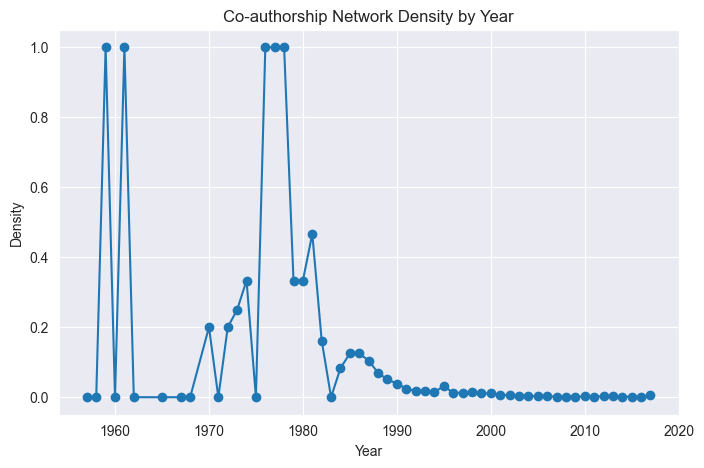

In [36]:
years = sorted(df_dblp_sample['year'].dropna().unique())
density_by_year = []

for y in years:
    # Filter papers from this year
    df_year = df_dblp_sample[df_dblp_sample['year'] == y]
    
    # Build subgraph
    G_year = nx.Graph()
    for _, row in df_year.iterrows():
        authors_list = row['authors']
        for i in range(len(authors_list)):
            for j in range(i+1, len(authors_list)):
                G_year.add_edge(authors_list[i], authors_list[j])
    
    if G_year.number_of_nodes() > 1:
        density = nx.density(G_year)
    else:
        density = 0
    density_by_year.append((y, density))

df_density = pd.DataFrame(density_by_year, columns=['year','density'])

plt.figure(figsize=(8,5))
plt.plot(df_density['year'], df_density['density'], marker='o')
plt.title('Co-authorship Network Density by Year')
plt.xlabel('Year')
plt.ylabel('Density')
plt.show()

#### Identify infl uential researchers using centrality measures (degree, betweenness, closeness).

In [37]:
degree_centrality = nx.degree_centrality(G_coauthor)

# Computing these takes so long, so we use faster methods
# betweenness_centrality = nx.betweenness_centrality(G_coauthor)
# closeness_centrality = nx.closeness_centrality(G_coauthor)

In [15]:
def networkx_to_igraph(G_nx):
    # Map node labels to integer indices
    nodes = list(G_nx.nodes())
    node_index_map = {node: i for i, node in enumerate(nodes)}

    # Create an igraph graph with the same number of vertices
    G_ig = ig.Graph(n=len(nodes), directed=False)

    # Set vertex names (optional, so we can map back later)
    G_ig.vs["name"] = nodes

    # Add edges
    edges = []
    for u, v in G_nx.edges():
        edges.append((node_index_map[u], node_index_map[v]))
    G_ig.add_edges(edges)

    return G_ig

# Convert your NetworkX co-author graph to igraph instance for faster computations
G_ig = networkx_to_igraph(G_coauthor)

In [45]:
# Betweenness Centrality
betweenness_ig = G_ig.betweenness()  # returns a list of betweenness values for each vertex

# Normalize by (n-1)(n-2)/2 for undirected:
n = G_ig.vcount()
betweenness_ig_normalized = [b / ((n-1)*(n-2)/2) for b in betweenness_ig]

# Mapping back to the author names:
author_betweenness = {}
for idx, val in enumerate(betweenness_ig_normalized):
    author_name = G_ig.vs[idx]["name"]
    author_betweenness[author_name] = val

# Now author_betweenness is a dict { author: betweenness_value }

In [46]:
# Closeness Centrality
closeness_ig = G_ig.closeness()

# closeness_ig is a list of closeness values, one per vertex in G_ig.
# Map them back to node names:
node_names = G_ig.vs["name"]
closeness_dict = dict(zip(node_names, closeness_ig))

# Now closeness_dict[node] = closeness value

In [47]:
# Sort each measure and pick top 5 (for example)
top_degree = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:5]
top_betweenness = sorted(author_betweenness.items(), key=lambda x: x[1], reverse=True)[:5]
top_closeness = sorted(closeness_dict.items(), key=lambda x: x[1], reverse=True)[:5]

print("Top 5 by Degree Centrality:")
for author, val in top_degree:
    print(f"{author}: {val:.4f}")

print("\nTop 5 by Betweenness Centrality:")
for author, val in top_betweenness:
    print(f"{author}: {val:.4f}")

print("\nTop 5 by Closeness Centrality:")
for author, val in top_closeness:
    print(f"{author}: {val:.4f}")

Top 5 by Degree Centrality:
Henning Hermjakob: 0.0037
Ewan Birney: 0.0028
Gautier Koscielny: 0.0019
Peter An: 0.0019
Denise R. Carvalho-Silva: 0.0019

Top 5 by Betweenness Centrality:
Yang Xu: 0.0009
Yi Liu: 0.0008
Li Ning: 0.0007
Fei Chen: 0.0007
Alex X. Liu: 0.0007

Top 5 by Closeness Centrality:
Luís Fernando Orleans: 1.0000
Geraldo Zimbrão: 1.0000
Artur Zawadzki: 1.0000
Marek Gorgon: 1.0000
Yadong Wang: 1.0000


#### Find communities of authors working in similar fields.

In [49]:
from networkx.algorithms import community

communities = community.greedy_modularity_communities(G_coauthor)
print(f"Found {len(communities)} communities in the co-authorship network.")

# Each 'community' is a set of author nodes
for i, c in enumerate(communities[:5], start=1):
    print(f"Community {i}: {len(c)} authors")
    print(list(c)[:10])

Found 6774 communities in the co-authorship network.
Community 1: 268 authors
['Yudong Feng', 'Jingqi Wang', 'Chen-Lin Zhang', 'Chengqing Li', 'Jiawei Chen', 'Atika Rivenq', 'Hong Luo', 'Qi Ling', 'Pengtao Xie', 'S. B. Wang']
Community 2: 217 authors
['Alok N. Choudhary', 'Shirish S. Karande', 'Xingou Xu', 'Zhongwei Li', 'Ying Sun', 'Robyn L. Morgan', 'Jinxue Sui', 'Xiaoguang Liu', 'Li Ping', 'Lingqiao Liu']
Community 3: 198 authors
['Jürgen Kurths', 'Nalini Venkatasubramanian', 'Jialie Shen', 'Mingli Song', 'Yuan Gao', 'Dina Bitton', 'Qinghua Hu', 'Ji Feng Zhang', 'Ruiling Liu', 'Qiang Wang']
Community 4: 154 authors
['Jiyong Pang', 'V.b Dhanalakshmi', 'Yue Lu', 'Fernando A. Quintana', 'Vanish Talwar', 'Yuan Ji', 'Karen Kua', 'M Hammoudeh', 'B Jaysimha', 'Qingqing Yuan']
Community 5: 113 authors
['Antonio Fabregat', 'Eliseo Papa', 'Edward Turner', 'A. Patrícia Bento', 'Andrea Pierleoni', 'Camille Laibe', 'Philipp Bucher', 'Falk Schreiber', 'Peter An', 'Alex Bateman']


## 1.2.3 Venue Network (Conference-Journal Network)

### Nodes: Conferences/Journals (from venue field), Edges: If a paper cites another paper from a different venue, an edge is created between venues.

In [12]:
G_venue = nx.DiGraph()

# Collect all venues
all_venues = df_dblp_sample['venue'].unique()

# Add nodes
G_venue.add_nodes_from(all_venues)

# Map paper_id -> venue for quick lookup
paper_id_to_venue = df_dblp_sample.set_index('id')['venue'].to_dict()

for idx, row in df_dblp_sample.iterrows():
    citing_paper_venue = row['venue']
    refs = row['references']
    for r in refs:
        if r in paper_id_to_venue:
            cited_venue = paper_id_to_venue[r]
            if cited_venue != citing_paper_venue:
                G_venue.add_edge(citing_paper_venue, cited_venue)

print("Venue Network Stats:")
print(f"Number of venue nodes: {G_venue.number_of_nodes()}")
print(f"Number of edges (inter-venue citations): {G_venue.number_of_edges()}")

Venue Network Stats:
Number of venue nodes: 1732
Number of edges (inter-venue citations): 248


#### Analyze interdisciplinary collaborations between venues.

In [18]:
G_ig = networkx_to_igraph(G_venue)

# Betweenness Centrality
betweenness_ig = G_ig.betweenness()  # returns a list of betweenness values for each vertex

# Normalize by (n-1)(n-2)/2 for undirected:
n = G_ig.vcount()
betweenness_ig_normalized = [b / ((n-1)*(n-2)/2) for b in betweenness_ig]

# Mapping back to the author names:
betweenness = {}
for idx, val in enumerate(betweenness_ig_normalized):
    author_name = G_ig.vs[idx]["name"]
    betweenness[author_name] = val
    
top_interdisciplinary_venues = sorted(betweenness.items(), key=lambda x: x[1], reverse=True)[:10]
print("Top interdisciplinary venues based on betweenness centrality:")
for venue, score in top_interdisciplinary_venues:
    print(f"{venue}: {score}")

In [23]:
from community import community_louvain

# Detect communities
partition = community_louvain.best_partition(G_venue.to_undirected())

# Count venues per community
from collections import Counter
community_counts = Counter(partition.values())

# Find interdisciplinary venues (those in smaller communities)
interdisciplinary_venues = [venue for venue, comm in partition.items() if community_counts[comm] <= 1]  # Arbitrary threshold

print("Potential interdisciplinary venues:", interdisciplinary_venues)

Potential interdisciplinary venues: ['multimedia signal processing', 'international conference on enterprise information systems', 'Journal of Systems Architecture', 'Journal of Machine Vision and Applications', 'conference of the international speech communication association', 'international conference for young computer scientists', 'Journal of Computer-Mediated Communication', 'IEEE Transactions on Multimedia', 'Spring', 'Computers & Industrial Engineering', 'arXiv: Information Retrieval', 'cooperative information systems', 'Journal of the Operational Research Society', 'international cryptology conference', 'hawaii international conference on system sciences', 'vision modeling and visualization', 'IEEE Transactions on Aerospace and Electronic Systems', 'IEEE Transactions on Professional Communication', 'Computer Physics Communications', 'design, automation, and test in europe', 'arXiv: Learning', 'graph drawing', 'IEEE Transactions on Instrumentation and Measurement', 'Internation

In [39]:
# Basic measure: network density
venue_density = nx.density(G_venue.to_undirected())
print("Venue network density:", venue_density)

# Could check communities:
communities_venues = community.greedy_modularity_communities(G_venue.to_undirected())
print(f"Found {len(communities_venues)} communities among venues.")

Venue network density: 0.0001634372794430591
Found 1523 communities among venues.


#### Find the most influential venues using centrality metrics.

In [40]:
# Use networkx centrality:
venue_pagerank = nx.pagerank(G_venue)
# Or other metrics: betweenness_centrality, closeness_centrality, etc.

sorted_venue_pagerank = sorted(venue_pagerank.items(), key=lambda x: x[1], reverse=True)

print("Top 5 Venues by PageRank:")
for v, score in sorted_venue_pagerank[:5]:
    print(f"{v}: {score:.4f}")

Top 5 Venues by PageRank:
Journal of Machine Learning Research: 0.0104
Journal of Artificial Intelligence Research: 0.0091
: 0.0083
IEEE Transactions on Pattern Analysis and Machine Intelligence: 0.0040
Neural Computation: 0.0037


* __High in-degree__: a venue that is often cited by other venues.
* __High PageRank__: a venue that is cited not only often but by other highly cited venues.
* __High betweenness__: a venue bridging different communities of venues.

#### Identify Emerging Fields (Newly Formed Connections)

A simplistic approach:

    Compare the network edges over time. If you see that a pair of venues had no citations between them until recently (e.g., last few years), that might indicate a new interdisciplinary connection.
    Another angle: a newly created venue itself can be considered “emerging” if it quickly gains citations or new edges in a short time.

Implementation:

    Build the venue network year by year (or cumulatively).
    Track when an edge (venueA, venueB) first appears. If it’s new in year Y, that might be an “emerging” collaboration.
    If a brand-new venue appears in year Y (based on first publication), watch how quickly it forms edges with others.

In [26]:
# 1) Build a dict: paper_id -> venue
paper_to_venue = dict(zip(df_dblp_sample['id'], df_dblp_sample['venue']))

# 2) Sort years
years = sorted(df_dblp_sample['year'].dropna().unique())

# Dictionaries to track first appearances:
#   venue_first_appearance[v] = the year this venue first had a paper in the dataset
#   edge_first_appearance[(v1,v2)] = the first year we see a citation crossing venue v1 <-> v2
venue_first_appearance = {}
edge_first_appearance = {}

# For convenience, we will store edges as an Undirected tuple (sorted),
# so that an edge (VenueA, VenueB) is the same as (VenueB, VenueA).
# If you want directed edges, remove the sorting step.

# 3) Cumulative approach:
cited_paper_ids_so_far = set()

for y in years:
    # Filter papers published exactly in year y
    df_year = df_dblp_sample[df_dblp_sample['year'] == y]

    # 3a) Identify brand-new venues this year
    new_venues_this_year = df_year['venue'].unique()
    for v in new_venues_this_year:
        if v not in venue_first_appearance:
            venue_first_appearance[v] = y

    # 3b) For each paper in this year, look at references
    for idx, row in df_year.iterrows():
        citing_venue = row['venue']
        refs = row['references']

        # For each reference, see if the referenced paper is in the dataset
        for r in refs:
            if r in paper_to_venue:
                cited_venue = paper_to_venue[r]
                if cited_venue != citing_venue:
                    # Sort to store undirected edge (v1, v2)
                    e = tuple(sorted([citing_venue, cited_venue]))
                    if e not in edge_first_appearance:
                        # This is the first time we see a citation crossing these two venues
                        edge_first_appearance[e] = y

print("Done identifying newly formed inter-venue edges and first appearance of venues!")

Done identifying newly formed inter-venue edges and first appearance of venues!


In [27]:
from collections import defaultdict

venue_count_by_year = defaultdict(int)

for v, first_y in venue_first_appearance.items():
    venue_count_by_year[first_y] += 1

# Sort by year and print
for y in sorted(venue_count_by_year.keys()):
    print(f"Year {y}: {venue_count_by_year[y]} new venues")

Year 1957: 1 new venues
Year 1958: 1 new venues
Year 1960: 1 new venues
Year 1962: 1 new venues
Year 1965: 1 new venues
Year 1967: 1 new venues
Year 1970: 1 new venues
Year 1972: 3 new venues
Year 1973: 3 new venues
Year 1974: 3 new venues
Year 1975: 1 new venues
Year 1976: 1 new venues
Year 1977: 1 new venues
Year 1978: 2 new venues
Year 1979: 2 new venues
Year 1980: 2 new venues
Year 1981: 1 new venues
Year 1982: 5 new venues
Year 1983: 2 new venues
Year 1984: 5 new venues
Year 1985: 7 new venues
Year 1986: 4 new venues
Year 1987: 3 new venues
Year 1988: 8 new venues
Year 1989: 11 new venues
Year 1990: 12 new venues
Year 1991: 14 new venues
Year 1992: 16 new venues
Year 1993: 18 new venues
Year 1994: 23 new venues
Year 1995: 21 new venues
Year 1996: 20 new venues
Year 1997: 27 new venues
Year 1998: 18 new venues
Year 1999: 30 new venues
Year 2000: 47 new venues
Year 2001: 44 new venues
Year 2002: 37 new venues
Year 2003: 57 new venues
Year 2004: 73 new venues
Year 2005: 83 new venues

In [28]:
edge_count_by_year = defaultdict(int)

for e, first_y in edge_first_appearance.items():
    edge_count_by_year[first_y] += 1

for y in sorted(edge_count_by_year.keys()):
    print(f"Year {y}: {edge_count_by_year[y]} new inter-venue edges")

Year 1989: 1 new inter-venue edges
Year 1991: 1 new inter-venue edges
Year 1992: 1 new inter-venue edges
Year 1994: 3 new inter-venue edges
Year 1997: 2 new inter-venue edges
Year 1998: 1 new inter-venue edges
Year 1999: 3 new inter-venue edges
Year 2000: 2 new inter-venue edges
Year 2001: 4 new inter-venue edges
Year 2002: 3 new inter-venue edges
Year 2003: 6 new inter-venue edges
Year 2004: 7 new inter-venue edges
Year 2005: 10 new inter-venue edges
Year 2006: 8 new inter-venue edges
Year 2007: 5 new inter-venue edges
Year 2008: 20 new inter-venue edges
Year 2009: 27 new inter-venue edges
Year 2010: 11 new inter-venue edges
Year 2011: 12 new inter-venue edges
Year 2012: 12 new inter-venue edges
Year 2013: 8 new inter-venue edges
Year 2014: 21 new inter-venue edges
Year 2015: 17 new inter-venue edges
Year 2016: 46 new inter-venue edges
Year 2017: 14 new inter-venue edges


In [29]:
target_year = 2015
new_edges_2015 = [ e for e, yr in edge_first_appearance.items() if yr == target_year ]
print(f"Edges that first appeared in {target_year}:")
for edge in new_edges_2015[:20]:  # show first 20
    print(edge)

Edges that first appeared in 2015:
('IEEE Transactions on Information Theory', 'international conference on communications')
('intelligent robots and systems', 'robot and human interactive communication')
('Journal of Electronic Imaging', 'Journal of Real-time Image Processing')
('ieee-ras international conference on humanoid robots', 'intelligent robots and systems')
('ACM Communications in Computer Algebra', 'symposium on computer arithmetic')
('IEEE Transactions on Pattern Analysis and Machine Intelligence', 'international conference on image processing')
('IEEE\\/ACM Transactions on Networking', 'Security and Communication Networks')
('IEEE Journal of Selected Topics in Signal Processing', 'IEEE Transactions on Signal Processing')
('IEEE Transactions on Communications', 'wireless communications and networking conference')
('Algorithmica', 'Journal of the ACM')
('Algorithmica', 'symposium on the theory of computing')
('international conference on computer design', 'international sym

Identifying “Emerging Fields”

With these first-appearance data, you can:

    Look for years with a surge of new edges:
        If some year has a big spike in cross-venue connections, that may indicate an emerging interdisciplinary trend.
    Focus on newly created venues that quickly form many edges within a short time (e.g., within 1–2 years of first appearance).
    Evaluate the citation volume (or in-degree/out-degree in a directed sense) for those new edges/venues.

For instance, to see if a new venue is “emerging,” you might check:

    The difference between the venue’s first appearance year and the year it accumulates (for example) a certain number of inter-venue edges.

In [33]:
# Suppose we define "emerging" as: a venue formed in year Y0 that has > 5 new edges by Y0+2.

emerging_venues = []
for v, start_year in venue_first_appearance.items():
    # Count how many edges referencing or cited by v appeared within 2 years
    end_year = start_year + 2
    # Look up how many edges have v as part of the tuple e=(v1,v2)
    new_edge_count = 0
    for (v1, v2), edge_year in edge_first_appearance.items():
        if edge_year <= end_year and (v == v1 or v == v2):
            new_edge_count += 1
    
    if new_edge_count > 1:
        emerging_venues.append((v, start_year, new_edge_count))

print("Potential Emerging Venues (with >1 edges within 2 years of first appearance):")
for v, y, ec in emerging_venues:
    print(f" Venue={v}, StartYear={y}, EdgeCount_2yrs={ec}")

Potential Emerging Venues (with >5 edges within 2 years of first appearance):
 Venue=asian test symposium, StartYear=2004, EdgeCount_2yrs=2
 Venue=communications and mobile computing, StartYear=2009, EdgeCount_2yrs=2
 Venue=ubiquitous computing, StartYear=2013, EdgeCount_2yrs=2


## 1.2.4 Temporal Evolution of the Citation Network

#### Plot the network density per year to observe citation growth.

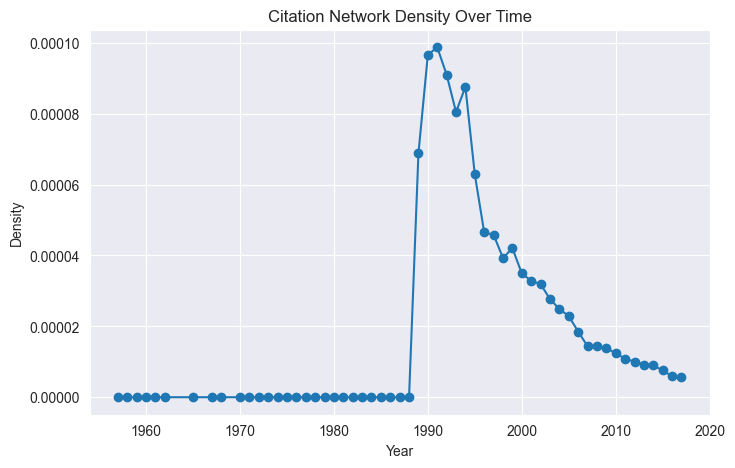

In [42]:
years = sorted(df_dblp_sample['year'].dropna().unique())
density_per_year = []

for y in years:
    # Subset papers up to and including year y (cumulative)
    subset_papers = df_dblp_sample[df_dblp_sample['year'] <= y]['id'].unique()
    G_sub = nx.DiGraph()
    G_sub.add_nodes_from(subset_papers)
    
    # Add edges for citations among that subset
    for idx, row in df_dblp_sample[df_dblp_sample['year'] <= y].iterrows():
        src = row['id']
        for r in row['references']:
            if r in subset_papers:
                G_sub.add_edge(src, r)
    
    # Convert to undirected for the density measure
    density = nx.density(G_sub.to_undirected())
    density_per_year.append((y, density))

df_density_year = pd.DataFrame(density_per_year, columns=['year','density'])

plt.figure(figsize=(8,5))
plt.plot(df_density_year['year'], df_density_year['density'], marker='o')
plt.title('Citation Network Density Over Time')
plt.xlabel('Year')
plt.ylabel('Density')
plt.show()

#### Identify bursts of influential papers (papers that suddenly get many citations).

In [42]:
# Identify top cited papers per year
top_cited_per_year = defaultdict(list)

for year in years:
    yearly_papers = df_dblp_sample[df_dblp_sample['year'] == year]
    yearly_papers = yearly_papers[['id', 'n_citation']].sort_values(by='n_citation', ascending=False)
    
    # Select top 3 highly cited papers per year
    top_cited_per_year[year] = yearly_papers.head(3).to_dict(orient='records')

# Print burst papers
for year, papers in top_cited_per_year.items():
    print(f"Year {year}:")
    for paper in papers:
        print(f"  Paper ID: {paper['id']}, Citations: {paper['n_citation']}")
    print()

Year 1957:
  Paper ID: 50fbb108-664d-4bce-adbf-126168308e88, Citations: 0

Year 1958:
  Paper ID: 6796082f-7ccc-4e35-aa6a-1247de7e8e3f, Citations: 50

Year 1959:
  Paper ID: d3978c20-1996-4316-872d-a922919a01df, Citations: 50

Year 1960:
  Paper ID: b6888ba4-08f0-44a3-9b1c-13bbfdcdd177, Citations: 50
  Paper ID: c715ac8c-7ca5-4d1c-b19a-735ebe509169, Citations: 1
  Paper ID: ade619a1-8176-4ff5-a58e-cafb8a9da492, Citations: 0

Year 1961:
  Paper ID: 87c79be1-a67e-4d26-b033-28a218c89b62, Citations: 56

Year 1962:
  Paper ID: 9a821a79-1298-4db2-aa83-6f26fbe4f3cc, Citations: 50
  Paper ID: 3d6b42d9-1e7f-4cf1-9dd2-864f818b1e94, Citations: 0

Year 1965:
  Paper ID: 24199789-257d-4b45-a5ce-456b431256d4, Citations: 10

Year 1967:
  Paper ID: e7a1c2ce-f8cd-477f-b786-13f62b1026cf, Citations: 3

Year 1968:
  Paper ID: d202c6bb-97bd-4fdf-b47a-d65b08da32cd, Citations: 50

Year 1970:
  Paper ID: 79ab0a9f-7af9-487c-8e6e-c4a26ace73f9, Citations: 93
  Paper ID: cde7314a-1c00-4e8b-a17f-3a2e7245a8bc, Cita

#### Examine how new papers integrate into the existing network.

In [47]:
citation_graph = nx.DiGraph()

# Add nodes and edges based on citations
for _, row in df_dblp_sample.iterrows():
    citation_graph.add_node(row['id'], year=row['year'])
    for ref in row['references']:
        if ref in df_dblp_sample['id'].values:  # Ensure the referenced paper exists
            citation_graph.add_edge(ref, row['id'])  # Edge: Older paper → Newer paper

print(f"Total papers in dataset: {len(citation_graph.nodes)}")
print(f"Total citation edges: {len(citation_graph.edges)}")

Total papers in dataset: 10000
Total citation edges: 289


In [48]:
# Compute average in-degree of new papers over time
avg_in_degree_per_year = {}

for year in years:
    new_papers = [node for node, attr in citation_graph.nodes(data=True) if attr['year'] == year]
    in_degrees = [citation_graph.in_degree(paper) for paper in new_papers]
    
    avg_in_degree_per_year[year] = np.mean(in_degrees) if in_degrees else 0

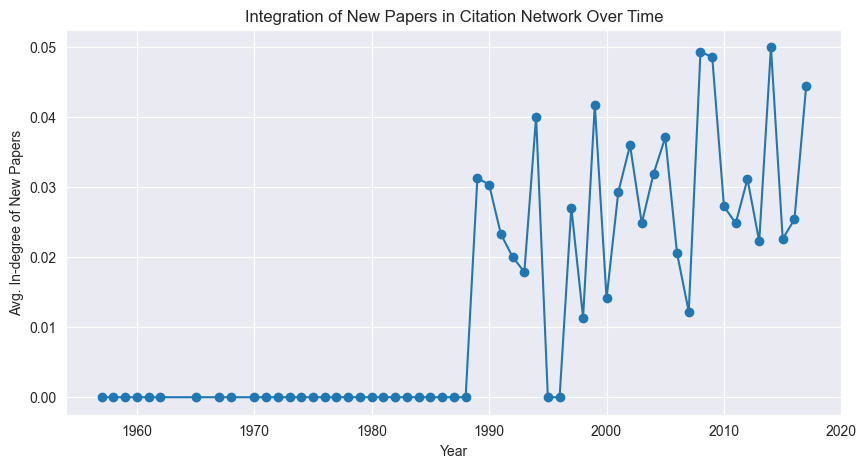

In [49]:
# Plot Average In-degree of New Papers Over Time
plt.figure(figsize=(10, 5))
plt.plot(avg_in_degree_per_year.keys(), avg_in_degree_per_year.values(), marker='o', linestyle='-')
plt.xlabel("Year")
plt.ylabel("Avg. In-degree of New Papers")
plt.title("Integration of New Papers in Citation Network Over Time")
plt.grid(True)
plt.show()

# 2 Data Extrapolation via Clustering

## 2.1 Community Detection

#### Find the author-author network. Make sure each author retains the data about the papers it has published

In [53]:
# 1) Create a dict of author -> set of paper_ids
author_to_papers = {}

for idx, row in df_dblp_sample.iterrows():
    paper_id = row['id']
    authors_list = row['authors']
    for author in authors_list:
        if author not in author_to_papers:
            author_to_papers[author] = set()
        author_to_papers[author].add(paper_id)

# 2) Build the co-author graph
G_coauthor = nx.Graph()

# Add nodes (authors) with an attribute "papers"
for author, papers in author_to_papers.items():
    G_coauthor.add_node(author, papers=papers)

# Add edges between authors who co-authored at least 1 paper
# Iterate over each paper, then connect all pairs of authors for that paper.
for idx, row in df_dblp_sample.iterrows():
    authors_list = row['authors']
    # connect each pair in authors_list
    for i in range(len(authors_list)):
        for j in range(i+1, len(authors_list)):
            a1 = authors_list[i]
            a2 = authors_list[j]
            # Add edge in an undirected graph
            G_coauthor.add_edge(a1, a2)

print("Author-Author Network built.")
print("Number of nodes (authors):", G_coauthor.number_of_nodes())
print("Number of edges (co-author relationships):", G_coauthor.number_of_edges())

Author-Author Network built.
Number of nodes (authors): 29353
Number of edges (co-author relationships): 52224


#### Find the author communities in this network using a fitting clustering algorithm. You are allowed to use any algorithm, as long as the results make sense (Louvain, Walktrap, Hierarchical, Spectral, Newman, etc.). You must train 3 clustering algorithms.

In [17]:
import random

def sample_author_graph(G, fraction=0.1, seed=42):
    random.seed(seed)
    all_authors = list(G.nodes())
    sample_size = int(len(all_authors) * fraction)
    sampled_authors = set(random.sample(all_authors, sample_size))
    
    # Induce a subgraph
    G_sub = G.subgraph(sampled_authors).copy()
    return G_sub

# Sample 10% of authors
G_sub = sample_author_graph(G_coauthor, fraction=0.1)
print("Sampled author graph:")
print(f" Nodes: {G_sub.number_of_nodes()}, Edges: {G_sub.number_of_edges()}")

Sampled author graph:
 Nodes: 2935, Edges: 504


In [51]:
def nx_to_igraph(G_nx):
    nodes = list(G_nx.nodes())
    idx_map = {node: i for i, node in enumerate(nodes)}
    
    G_ig = ig.Graph(n=len(nodes), directed=False)
    G_ig.vs['name'] = nodes
    
    edges = []
    for u, v in G_nx.edges():
        edges.append((idx_map[u], idx_map[v]))
    G_ig.add_edges(edges)
    return G_ig

G_ig_sub = nx_to_igraph(G_sub)

In [19]:
# Louvain in igraph
communities_louvain = G_ig_sub.community_multilevel()  # returns a VertexClustering object
labels_louvain = communities_louvain.membership  # list of cluster IDs for each vertex
# 'labels_louvain[i]' is the cluster index for node i (in igraph's indexing)

In [20]:
# Walktrap in igraph
communities_walktrap = G_ig_sub.community_walktrap().as_clustering()
labels_walktrap = communities_walktrap.membership

In [21]:
communities_fastgreedy = G_ig_sub.community_fastgreedy().as_clustering()
labels_fastgreedy = communities_fastgreedy.membership

In [22]:
ig_nodes = G_ig_sub.vs["name"]  # list of author names in igraph order
node_index_in_ig = {name: idx for idx, name in enumerate(ig_nodes)}

nx_nodes = list(G_sub.nodes())  # the order of Nx nodes

def reorder_labels_ig_to_nx(labels_ig, nx_nodes, node_index_map):
    """Reorder iGraph cluster labels to match Nx node ordering."""
    reordered = []
    for node in nx_nodes:
        ig_idx = node_index_map[node]
        reordered.append(labels_ig[ig_idx])
    return reordered

labels_louvain_nx = reorder_labels_ig_to_nx(labels_louvain, nx_nodes, node_index_in_ig)
labels_walktrap_nx = reorder_labels_ig_to_nx(labels_walktrap, nx_nodes, node_index_in_ig)
labels_fastgreedy_nx = reorder_labels_ig_to_nx(labels_fastgreedy, nx_nodes, node_index_in_ig)

In [23]:
def compute_cluster_clustering_coefficient(G_nx, node_labels):
    """
    node_labels[i] = cluster ID for the i-th node in list(G_nx.nodes()).
    Returns the average local clustering coefficient across all cluster subgraphs.
    """
    cluster2nodes = defaultdict(list)
    nx_nodes_list = list(G_nx.nodes())
    
    for i, node in enumerate(nx_nodes_list):
        cluster_id = node_labels[i]
        cluster2nodes[cluster_id].append(node)
    
    cluster_scores = []
    for c_id, c_nodes in cluster2nodes.items():
        if len(c_nodes) < 2:
            cluster_scores.append(0.0)
            continue
        subG = G_nx.subgraph(c_nodes)
        local_clustering_dict = nx.clustering(subG)  # {node: local_clustering}
        avg_clust = np.mean(list(local_clustering_dict.values()))
        cluster_scores.append(avg_clust)
    
    if len(cluster_scores) == 0:
        return 0.0
    return float(np.mean(cluster_scores))

In [24]:
score_louvain = compute_cluster_clustering_coefficient(G_sub, labels_louvain_nx)
score_walktrap = compute_cluster_clustering_coefficient(G_sub, labels_walktrap_nx)
score_fastgreedy = compute_cluster_clustering_coefficient(G_sub, labels_fastgreedy_nx)

print("Average Intra-Cluster Clustering Coeff:")
print(f"  Louvain:      {score_louvain:.15f}")
print(f"  Walktrap:     {score_walktrap:.15f}")
print(f"  Fast Greedy:  {score_fastgreedy:.15f}")

Average Intra-Cluster Clustering Coeff:
  Louvain:      0.017865707434053
  Walktrap:     0.017865707434053
  Fast Greedy:  0.017865707434053


In [54]:
#We choose Louvain as the best algorithm. 
G_ig_full = nx_to_igraph(G_coauthor)

communities_louvain_full = G_ig_full.community_multilevel()  # Louvain-like
labels_louvain_full = communities_louvain_full.membership  # list of cluster IDs

# Now, G_ig_full.vs['name'] tells us the node (author) names in igraph’s order:
ig_nodes_full = G_ig_full.vs['name']  
node_index_in_ig_full = {author: idx for idx, author in enumerate(ig_nodes_full)}

# Meanwhile, G_coauthor (NetworkX) has an order list(G_coauthor.nodes()). 
# Unify that or pick one consistent ordering.
nx_nodes_full = list(G_coauthor.nodes())

# Reorder the igraph-based labels so they line up with the Nx node order:
labels_louvain_full_nxorder = []
for node in nx_nodes_full:
    ig_idx = node_index_in_ig_full[node]  # the index in igraph
    labels_louvain_full_nxorder.append(labels_louvain_full[ig_idx])

# Build a dictionary that maps each author -> cluster ID.
author_communities = {}
for i, node in enumerate(nx_nodes_full):
    try:
        author_communities[node] |= { labels_louvain_full_nxorder[i] }
    except KeyError:
        author_communities[node] = { labels_louvain_full_nxorder[i] }

print("Number of authors:", len(author_communities))
# Now we have: author_communities[author] = set([cluster_id])

Number of authors: 29353


# 2.2 Naming the Communities

#### Each paper has an abstract and a title. We want to extract keywords from these text fi elds. Use KeyBERT for extracting keywords from each abstract/title and aggregate them together to form a single list of words as keywords for each paper.

In [11]:
from keybert import KeyBERT

kw_model = KeyBERT()

C:\Users\abolfazl\PycharmProjects\FDS-final\.venv\lib\site-packages\sentence_transformers\cross_encoder\CrossEncoder.py:13: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm, trange


In [12]:
paper_to_keywords = {}

# The number of keywords we want from each paper
NUM_KEYWORDS = 5

for idx, row in df_dblp_sample.iterrows():
    paper_id = row['id']
    title = str(row['title'])
    abstract = str(row['abstract'])
    
    # Combine text
    doc = title + ". " + abstract
    
    keywords_and_scores = kw_model.extract_keywords(doc, top_n=NUM_KEYWORDS)
    keywords_only = [kw[0] for kw in keywords_and_scores]
    
    paper_to_keywords[paper_id] = keywords_only

print("Done extracting keywords from each paper.")
# Now paper_to_keywords[paper_id] = ['keyword1', 'keyword2', ...]

C:\Users\abolfazl\PycharmProjects\FDS-final\.venv\lib\site-packages\transformers\models\bert\modeling_bert.py:440: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:555.)
  attn_output = torch.nn.functional.scaled_dot_product_attention(


Done extracting keywords from each paper.


In [13]:
paper_to_keywords['3e5ef05b-bb89-4717-bfc3-74a467529ded']

['hevc', 'parallelization', 'hdtv', 'compression', 'encoding']

#### Associate each paper with the corresponding community of authors. A paper might be in two or more communities, so make sure to handle this correctly.

In [27]:
from collections import defaultdict


paper_to_communities = defaultdict(set)

for idx, row in df_dblp_sample.iterrows():
    paper_id = row['id']
    authors_list = row['authors']
    
    # Collect all the communities from the authors
    paper_clusters = set()
    for author in authors_list:
        # if author might not be in author_communities (rare, but possible if they were excluded or missing)
        if author in author_communities:
            paper_clusters |= author_communities[author]  # union with the set of that author's communities

    # Now paper_clusters might hold multiple IDs if authors are in different communities
    paper_to_communities[paper_id] = paper_clusters

print("Example paper->communities mapping:")
for p, cset in list(paper_to_communities.items())[:10]:
    print(p, cset)

Example paper->communities mapping:
3e5ef05b-bb89-4717-bfc3-74a467529ded {0}
653894e3-b581-412c-ae3f-71d267b0ea9d {1}
0ba8b19f-9659-453f-8deb-50b87e26e41f {2}
f12c84ba-82a9-4835-b5fa-5e6715b1b6b3 {3}
5d197014-1fbb-40d8-8223-378dea0d4a30 {4}
7790685d-525b-4f64-bd58-12d8cea683c8 {5}
08f4b403-7400-48d6-981b-6e76424ac967 {6}
04adad30-8b65-4dc2-84bd-be8d7541d0e0 {7}
5bb77780-134d-4cc8-af42-fc237bdd1210 {8}
02bf09d4-b4ac-4d27-a5a7-3f4c6b362777 {9}


#### Aggregate the keywords of each paper from each community to get the keywords of the community. Explain your aggregation method, and report the keywords of each community in your report.

In [28]:
community_keywords = defaultdict(lambda: defaultdict(int))

for paper_id, cset in paper_to_communities.items():
    # keywords for this paper
    kws = paper_to_keywords.get(paper_id, [])
    for com_id in cset:
        # increment frequency counts of these keywords for that community
        for kw in kws:
            community_keywords[com_id][kw] += 1

# Now community_keywords[com_id] is a dict {keyword: freq}

In [29]:
COMMUNITY_TOP_K = 10  # how many top keywords to show

community_top_keywords = {}

for com_id, kw_freqs in community_keywords.items():
    # sort kw_freqs by frequency descending
    sorted_kws = sorted(kw_freqs.items(), key=lambda x: x[1], reverse=True)
    top_kws = [kw for (kw, freq) in sorted_kws[:COMMUNITY_TOP_K]]
    community_top_keywords[com_id] = top_kws

# Show them
for com_id, kws in community_top_keywords.items():
    print(f"Community {com_id} Top Keywords: {kws}")

Community 0 Top Keywords: ['hevc', 'parallelization', 'hdtv', 'compression', 'encoding', 'complexity', 'matrices', 'matrix', 'algorithms', 'processors']
Community 1 Top Keywords: ['concurrency', 'jdbc', 'qos', 'middleware', 'transactions']
Community 2 Top Keywords: ['camera', 'fpga', 'tracking', 'tilt', 'rotation']
Community 3 Top Keywords: ['tracking', 'cameras', 'filtering', 'track', 'filter', 'genome', 'genomes', 'compression', 'compressing', 'bacterial']
Community 4 Top Keywords: ['crowdsourcing', 'cloud', 'service', 'cloudified', 'services']
Community 5 Top Keywords: ['deconvolution', 'microscopy', 'restoration', 'confocal', '3d']
Community 6 Top Keywords: ['classification', 'networks', 'clustering', 'optimization', 'algorithm', 'classifier', 'videos', 'memory', 'recognition', 'unsupervised']
Community 7 Top Keywords: ['auditory', 'neural', 'speech', 'cortex', 'reconstruction']
Community 8 Top Keywords: ['outbreak', 'infection', 'stochastic', 'models', 'microbial']
Community 9 Top

#### Give each community a name, and explain how you came to choose these names.

Now that we have the top keywords for each community, we can look at them and manually or programmatically derive a descriptive name. This step often involves domain knowledge or heuristics.

__Example:__

    Look at the top 5–10 keywords for a community.
    Decide if they revolve around a theme, e.g.:
        Community 14 Top Keywords: ['robot', 'robots', 'robotic', 'videos', 'rates', 'game', 'rate', 'play', 'interactive', 'assembly'] → Name it “Robotics.”

## 2.3 Paper-Paper Clustering via Embedding

Embed the abstract and title of each paper using a fi tting embedding model such BERTopic or SentenceBERT, and aggregate them together.

Your embedding should contain the information of keywords of the community. An easy way would be to append the keywords as plaintext.

In [30]:
def get_community_keywords_union(paper_id, paper_to_communities, community_top_keywords):
    """
    Return a set of keywords by unioning all keywords from the communities 
    that paper belongs to.
    """
    comms = paper_to_communities.get(paper_id, [])
    keywords_union = set()
    for c in comms:
        if c in community_top_keywords:
            # add all top keywords from that community
            keywords_union |= set(community_top_keywords[c])
    return keywords_union

In [31]:
paper_texts = {}

for idx, row in df_dblp_sample.iterrows():
    paper_id = row['id']
    title = str(row['title'])
    abstract = str(row['abstract'])

    # union of community keywords
    comm_keywords = get_community_keywords_union(
        paper_id, 
        paper_to_communities,
        community_top_keywords
    )
    
    keywords_str = " ".join(comm_keywords)

    # Combine everything
    combined_text = title + "\n" + abstract + "\n" + keywords_str
    paper_texts[paper_id] = combined_text

In [32]:
from sentence_transformers import SentenceTransformer

model_name = "all-MiniLM-L6-v2"
embed_model = SentenceTransformer(model_name)

paper_ids = list(paper_texts.keys())
documents = [paper_texts[pid] for pid in paper_ids]

# Generate embeddings
embeddings = embed_model.encode(documents, show_progress_bar=True, device='cuda')
# embeddings is a list of vectors (one per document)

print("Embeddings shape:", len(embeddings), "x", len(embeddings[0]))

Batches: 100%|██████████| 313/313 [00:36<00:00,  8.47it/s]


Embeddings shape: 10000 x 384


#### Use any clustering algorithm of your choice to cluster these papers together.

In [33]:
from sklearn.cluster import KMeans
import numpy as np

X = np.array(embeddings)  # (N, d) shape

k = 10 
kmeans_model = KMeans(n_clusters=k, random_state=42)
kmeans_model.fit(X)
labels = kmeans_model.labels_  # cluster assignment for each paper

#### Evaluate your clustering algorithm using DBI and Silhouette scores.

In [34]:
from sklearn.metrics import davies_bouldin_score

dbi = davies_bouldin_score(X, labels)
print("Davies-Bouldin Index (lower is better):", dbi)

Davies-Bouldin Index (lower is better): 4.19666627671362


In [35]:
from sklearn.metrics import silhouette_score

sil_score = silhouette_score(X, labels, metric='euclidean')
print("Silhouette Score (higher is better):", sil_score)

Silhouette Score (higher is better): 0.031605434


#### Report the unique venue values of the dataset.

In [36]:
unique_venues = df_dblp_sample['venue'].unique()
print("Unique Venues:")
print(unique_venues)
print("Count:", len(unique_venues))

Unique Venues:
['multimedia signal processing'
 'international conference on enterprise information systems'
 'Journal of Systems Architecture' ...
 'international conference on parallel architectures and compilation techniques'
 'Microelectronics Journal'
 'International Journal of Enterprise Information Systems']
Count: 1732


#### Compute the Jaccard Similarity Index of your clusters with the clustering of venues. The venue of each paper is a decent label for clustering as well!

In [37]:
paper_to_cluster = {}
for i, pid in enumerate(paper_ids):
    paper_to_cluster[pid] = labels[i]

paper_to_venue = dict(zip(df_dblp_sample['id'], df_dblp_sample['venue']))

In [38]:
def pairwise_same_label(paper_ids, label_func):
    """
    Return a set of pairs (i, j) where i < j and label_func(i) == label_func(j).
    paper_ids: list of paper IDs
    label_func: a function mapping paper ID -> label
    """
    s = set()
    n = len(paper_ids)
    for i in range(n):
        for j in range(i+1, n):
            pi = paper_ids[i]
            pj = paper_ids[j]
            if label_func(pi) == label_func(pj):
                s.add((pi, pj))
    return s

# We'll define label functions:
def cluster_label_func(pid):
    return paper_to_cluster[pid]

def venue_label_func(pid):
    return paper_to_venue.get(pid, None)

S = pairwise_same_label(paper_ids, cluster_label_func)
T = pairwise_same_label(paper_ids, venue_label_func)

intersect_size = len(S.intersection(T))
union_size = len(S.union(T))
if union_size > 0:
    jaccard = intersect_size / union_size
else:
    jaccard = 0

print(f"Jaccard Similarity (clusters vs. venue): {jaccard:.4f}")

Jaccard Similarity (clusters vs. venue): 0.0316


# 3 Citation Regressor

In [37]:
df_dblp['text'] = df_dblp['title'].astype(str) + " " + df_dblp['abstract'].astype(str)
df_test['text'] = df_test['title'].astype(str) + " " + df_test['abstract'].astype(str)

In [38]:
df_dblp = df_dblp.dropna(subset=['n_citation', 'year'])
df_test = df_test.dropna(subset=['year'])

In [42]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer("all-MiniLM-L6-v2")  # or another model

In [41]:
# Encode text from DBLP
corpus = df_dblp['text'].tolist()
embeddings = model.encode(corpus, show_progress_bar=True, device='cuda')
embeddings = np.array(embeddings)

# Combine with year
years = df_dblp['year'].values.reshape(-1, 1)
X_dblp = np.hstack([embeddings, years])

y_dblp = df_dblp['n_citation'].values  # the target

Batches:   0%|          | 0/31250 [00:00<?, ?it/s]C:\Users\abolfazl\PycharmProjects\FDS-final\.venv\lib\site-packages\transformers\models\bert\modeling_bert.py:440: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:555.)
  attn_output = torch.nn.functional.scaled_dot_product_attention(
Batches:   3%|▎         | 1043/31250 [02:50<1:22:31,  6.10it/s]


KeyboardInterrupt: 

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X_dblp, 
    y_dblp, 
    test_size=0.2, 
    random_state=42
)

In [25]:
# Save arrays
# np.savez("arrays.npz", a1=X_dblp, a2=y_dblp)

# Load later
# loaded = np.load("arrays.npz")
# X_dblp = loaded["a1"]
# y_dblp = loaded["a2"]

In [27]:
# Sample the data and use float16 data type, due to memory and time limit

train_indices = np.arange(len(X_train))
sample_indices = np.random.choice(train_indices, 
                                  size=int(0.005 * len(train_indices)), 
                                  replace=False)

X_train_sample = X_train[sample_indices]
y_train_sample = y_train[sample_indices]

X_train_sample = X_train_sample.astype(np.float16)  
y_train_sample = y_train_sample.astype(np.float16)  

In [30]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

rfr = RandomForestRegressor(random_state=42)

param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5]
}

grid_search = GridSearchCV(
    rfr, 
    param_grid=param_grid, 
    cv=3,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)
grid_search.fit(X_train_sample, y_train_sample)

print("Best params:", grid_search.best_params_)
print("Best score (MSE):", grid_search.best_score_)

Best params: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}
Best score (MSE): -6562.0023736739095


In [31]:
best_model = grid_search.best_estimator_

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_pred_val = best_model.predict(X_val)
rmse_val = mean_squared_error(y_val, y_pred_val, squared=False)
mae_val = mean_absolute_error(y_val, y_pred_val)
r2_val = r2_score(y_val, y_pred_val)

print("Validation RMSE:", rmse_val)
print("Validation MAE:", mae_val)
print("Validation R2:", r2_val)

Validation RMSE: 188.9590568450708
Validation MAE: 35.10701973794472
Validation R2: -0.005983225962113536


In [43]:
# Encode test set texts
test_corpus = df_test['text'].tolist()
test_embeddings = model.encode(test_corpus, show_progress_bar=True, device='cuda')
test_embeddings = np.array(test_embeddings)

Batches: 100%|██████████| 324/324 [00:42<00:00,  7.65it/s]


In [44]:
test_years = df_test['year'].values.reshape(-1, 1)
X_test = np.hstack([test_embeddings, test_years])

y_test = df_test['n_citation'].values

In [45]:
y_pred_test = best_model.predict(X_test)

rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print("Test RMSE:", rmse_test)
print("Test MAE:", mae_test)
print("Test R2:", r2_test)

Test RMSE: 325.9505962883385
Test MAE: 61.322339888284134
Test R2: -0.033947756805661866


__a) Time Gap__

* Issue: The test (crawled) papers might be from newer years than the training data. Citation patterns change, older papers accumulate more citations, etc.

* Why it’s a challenge: The model may not generalize well if the distribution of citations is different in the future.

* Possible ways to address:
    Include year as a feature (we did that).
    Potentially model time-lag or use a time-series approach (like “papers from 2010–2018” to predict citations 3 years after publication, etc.).

__b) New Concepts/Authors Over Time__

* Issue: The embedding model may see topics that were not common in the training set or brand-new authors.

* Why it’s a challenge: The text embedding might not fully capture novel research directions if the model was not exposed to such content. Or if the new authors are not in the training set, the model can’t infer their “influence.”

* Possible ways to address:
    Use a pre-trained LLM that is well-trained on broad topics (e.g., a recently updated Sentence-BERT).
    Keep the text-based approach, because a well-trained language model can handle new terms decently if they’re not extremely domain-specific.
    Regularly retrain or fine-tune the model with more recent data if possible.

# 4 Product

In [46]:
import pandas as pd
import numpy as np
from sentence_transformers import SentenceTransformer

df_all = pd.concat([df_dblp, df_test], ignore_index=True)

df_all['text'] = df_all['title'].astype(str) + "\n" + df_all['abstract'].astype(str)

In [47]:
model_name = "all-MiniLM-L6-v2"
embed_model = SentenceTransformer(model_name)

docs = df_all['text'].tolist()
paper_ids = df_all['id'].tolist()

In [48]:
embeddings = embed_model.encode(docs, show_progress_bar=True, device='cuda')  # shape: (N, d)

Batches: 100%|██████████| 31574/31574 [1:01:13<00:00,  8.60it/s] 


In [49]:
# np.save('embeddings4.npy', embeddings)
# embeddings4 = np.load('embeddings4.npy')

In [52]:
import faiss

d = embeddings.shape[1]  # dimension of embeddings
index = faiss.IndexFlatL2(d)

index.add(np.array(embeddings).astype(np.float32))

print("Number of vectors in Faiss index:", index.ntotal)

Number of vectors in Faiss index: 1010349


In [53]:
id_map = {i: paper_ids[i] for i in range(len(paper_ids))}  # to map index -> paper_id

In [55]:
import spacy

nlp = spacy.load("en_core_web_sm")

author_list = set()

# Build author set from the dataset
for authors in df_dblp['authors']:
    for author_name in authors:
        author_list.add(author_name)

print(f"Total unique authors in dataset: {len(author_list)}")

# Create a function to extract recognized authors from a user query
# We use spaCy's NER to see if there's a PERSON entity that matches an author in our dataset.
def extract_authors_spacy(query: str):
    doc = nlp(query)
    found_authors = []
    for ent in doc.ents:
        # Check if spaCy labeled this entity as a 'PERSON'
        if ent.label_ == "PERSON":
            # Check if the text matches an author from our dataset
            if ent.text in author_list:
                found_authors.append(ent.text)
    
    return found_authors

# Example usage:
user_query = "Show me recent papers by John Doe and Jane Smith about deep learning."
detected_authors = extract_authors_spacy(user_query)
print("Detected authors:", detected_authors)

Total unique authors in dataset: 957242
Detected authors: ['Jane Smith']


In [56]:
from keybert import KeyBERT

kw_extractor = KeyBERT(model=embed_model)

def get_query_keywords(query):
    keywords = kw_extractor.extract_keywords(query, top_n=5)
    # returns list of (keyword, score)
    return [kw for kw, _ in keywords]

In [ ]:
def retrieve_papers(query, top_k=5):
    # Step 1: Prepare the user query
    # TODO: Do some processes on the query if needed
    final_query = query
    
    # Step 2: Embed the query
    query_vec = embed_model.encode([final_query])  # shape (1, d)
    query_vec = np.array(query_vec).astype(np.float32)
    
    # Step 3: Faiss search
    D, I = index.search(query_vec, top_k)
    # I shape = (1, top_k) -> indices of top papers
    
    results = []
    for idx in I[0]:
        pid = id_map[idx]
        row = df_all[df_all['id'] == pid].iloc[0]
        results.append({
            'paper_id': pid,
            'title': row['title'],
            'abstract': row['abstract'],
            'year': row['year']
        })
    return results

In [58]:
query_str = "Papers by John Doe about graph neural networks"
top_papers = retrieve_papers(query_str, top_k=5)
for p in top_papers:
    print(p['paper_id'], p['title'], p['year'])

f0a65fca-e371-461e-a197-9b2b06d6af95 Neural networks and graph theory 2002
b5fce09a-388d-403c-b193-ac893dcfd8e0 Computational Capabilities of Graph Neural Networks 2009
903d62dccc969f5e6642d89fc746b94de7e8c1af Continuous Graph Neural Networks 2019
6c50722e-cd9b-4a8b-8bb2-25800968dd60 Supervised Neural Network Models for Processing Graphs 2013
d154c9f5-44aa-4705-8a17-4abb028cdf9f Neural computation, social networks, and topological spectra 2004


In [119]:
query_str = "Papers about using deep networks in medical usages"
top_papers = retrieve_papers(query_str, top_k=5)
for p in top_papers:
    print(p['paper_id'], p['title'], p['year'])

3fa4ab05-9f9c-4fa0-8dd1-51156ecd3b0e A Deep Learning Framework for Improving Medical Information Retrieval. 2015
c2588867-adf5-4dc7-86ef-a239cd81fc87 Exploring the application of deep learning techniques on medical text corpora. 2014
1446c8483411ca5654cd6fb0bc584f43e032a425 A survey on deep learning applied to medical images: from simple artificial neural networks to generative models 2022
a5f286e1-d98d-464a-989d-647fa09d4995 The effects of deep network topology on mortality prediction 2016
f8835454-b5e0-461d-b676-a18f8577bbd9 Deep Learning to Predict Patient Future Diseases from the Electronic Health Records 2016


In [114]:
from langchain.llms import OpenAI
from langchain.chains import ConversationalRetrievalChain
from langchain.docstore.document import Document
from langchain.schema import BaseRetriever
from typing import List, Any
from langchain.callbacks.manager import CallbackManagerForRetrieverRun


# Define a "retriever" that uses FAISS-based retrieval:
class FaissRetriever(BaseRetriever):
    index: Any
    embed_model: Any
    
    def __init__(self, index, embed_model):
        super().__init__()  
        self.index = index
        self.embed_model = embed_model
        
    def get_relevant_documents(self, query: str):
        # embed + search in Faiss
        results = retrieve_papers(query)
        # Convert to LangChain Document objects
        docs = []
        for r in results:
            content = r['title'] + "\n" + r['abstract']
            docs.append(Document(page_content=content, metadata={"paper_id": r['paper_id']}))
        return docs
    
    def _get_relevant_documents(self, query: str, *, run_manager: CallbackManagerForRetrieverRun) -> List[Document]:
        pass
    
    async def aget_relevant_documents(self, query: str):
        return self.get_relevant_documents(query)

In [125]:
from langchain_community.llms import HuggingFaceHub
import os
from langchain.chains import ConversationalRetrievalChain

retriever = FaissRetriever(index, embed_model)

HUGGINGFACE_API_KEY = os.getenv('HUGGINGFACE_API_KEY')


llm = HuggingFaceHub(
    repo_id="deepseek-ai/DeepSeek-V3",
    model_kwargs={"temperature": 0.7, "max_length": 512},
    huggingfacehub_api_token=HUGGINGFACE_API_KEY
)

In [126]:
from langchain.chains import ConversationalRetrievalChain
qa_chain = ConversationalRetrievalChain.from_llm(
    llm=llm,
    retriever=retriever,
    return_source_documents=True
)

In [127]:
chat_history = []
question = "Give me a summary of the main ideas in these papers."

result = qa_chain({"question": question, "chat_history": chat_history})
print("Answer:", result['answer'])

print("Papers used:", result['source_documents'])


Answer: Use the following pieces of context to answer the question at the end. If you don't know the answer, just say that you don't know, don't try to make up an answer.

Introduction to the best research papers from RE’05


Discussion of the Papers by Rissanen and by Wallace and Dowe


Introductory Overviews


Introductory Overview


Introduction to the special issue of best papers from RE2015 conference


Question: Give me a summary of the main ideas in these papers.
Helpful Answer: The main ideas in the papers discussed are: 1) Rissanen's paper on minimum description length (MDL) principles for model selection, and 2) Wallace and Dowe's paper on minimum message length (MML) for inference and prediction. Both papers discuss principles for selecting models based on their ability to compress data, with Rissanen focusing on MDL and Wallace and Dowe on MML.
Papers used: [Document(metadata={'paper_id': 'fe33c5ee-be2d-4585-9c5b-0cd6f1c64605'}, page_content='Introduction to the best resear